In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

/kaggle/input/wine-quality-prediction-b1/train.csv
/kaggle/input/wine-quality-prediction-b1/test.csv
/kaggle/input/wine-quality-prediction-b1/sample_submissionfile.csv


In [86]:
train_data = pd.read_csv("/kaggle/input/wine-quality-prediction-b1/train.csv")
train_data

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0,5
1,2,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9,7
2,3,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6,5
3,4,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
4,5,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,3946,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,8
3946,3947,6.3,0.30,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7,6
3947,3948,6.6,0.15,0.34,5.1,0.055,34.0,125.0,0.99420,3.36,0.42,9.6,5
3948,3949,7.0,0.45,0.34,19.8,0.040,12.0,67.0,0.99760,3.07,0.38,11.0,6


In [87]:
train_data.isnull().sum()
#theres no null values in the dataset

ID                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64

In [88]:
test_data = pd.read_csv("/kaggle/input/wine-quality-prediction-b1/test.csv")
test_df = test_data

In [89]:
X = train_data.iloc[:, 1:-1] # Exclude the first column and the last column
y = train_data.iloc[:, -1]
test_data = test_data.iloc[:,1:]

In [90]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0
1,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9
2,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6
3,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9
4,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7
...,...,...,...,...,...,...,...,...,...,...,...
3945,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2
3946,6.3,0.30,0.91,8.2,0.034,50.0,199.0,0.99394,3.39,0.49,11.7
3947,6.6,0.15,0.34,5.1,0.055,34.0,125.0,0.99420,3.36,0.42,9.6
3948,7.0,0.45,0.34,19.8,0.040,12.0,67.0,0.99760,3.07,0.38,11.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

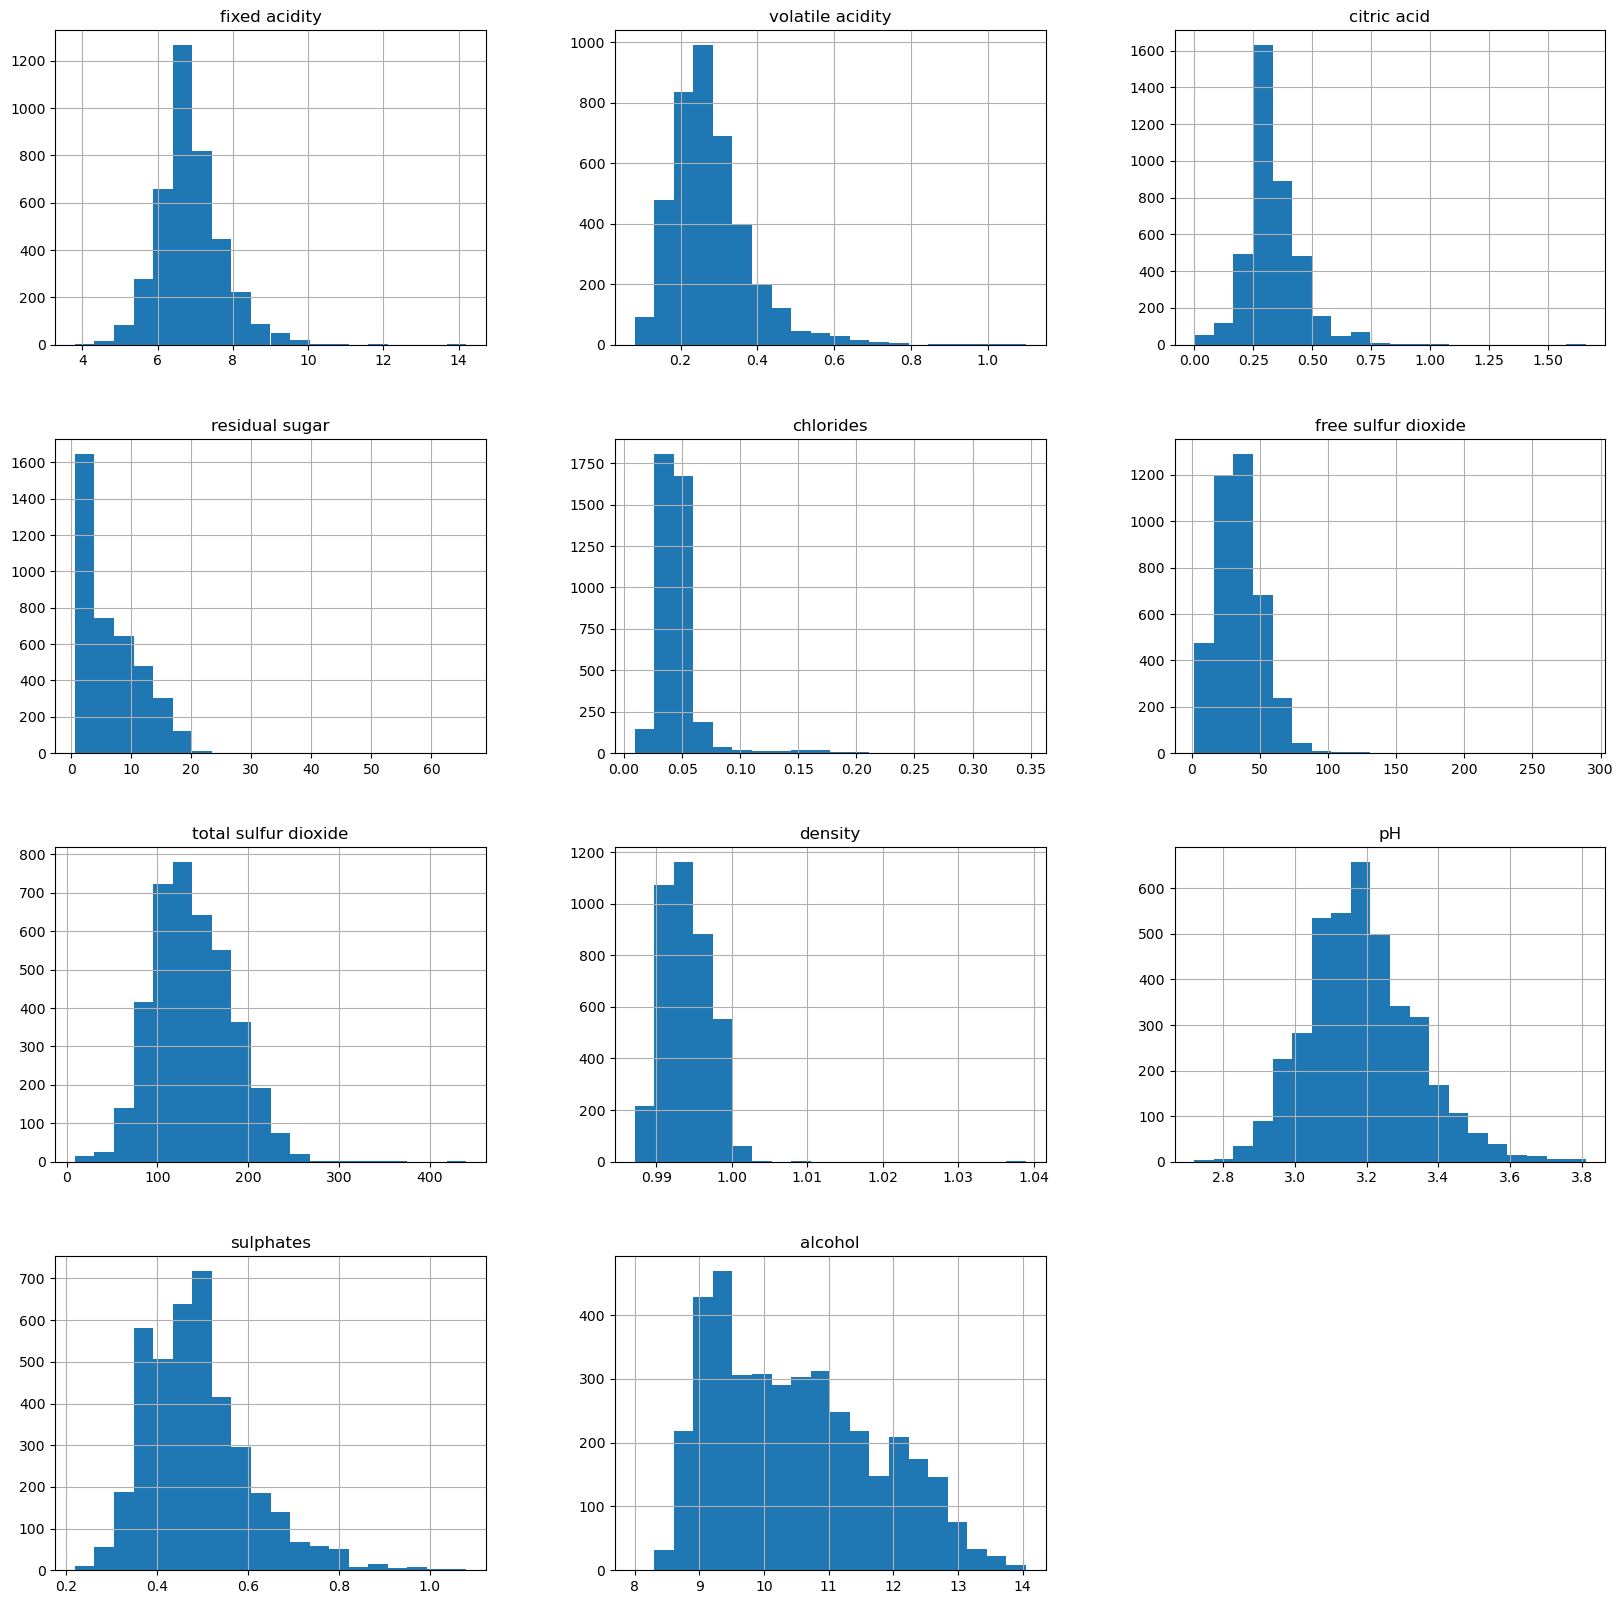

In [92]:
X.hist(bins=20, figsize=(20,20))
plt.show()

<Axes: >

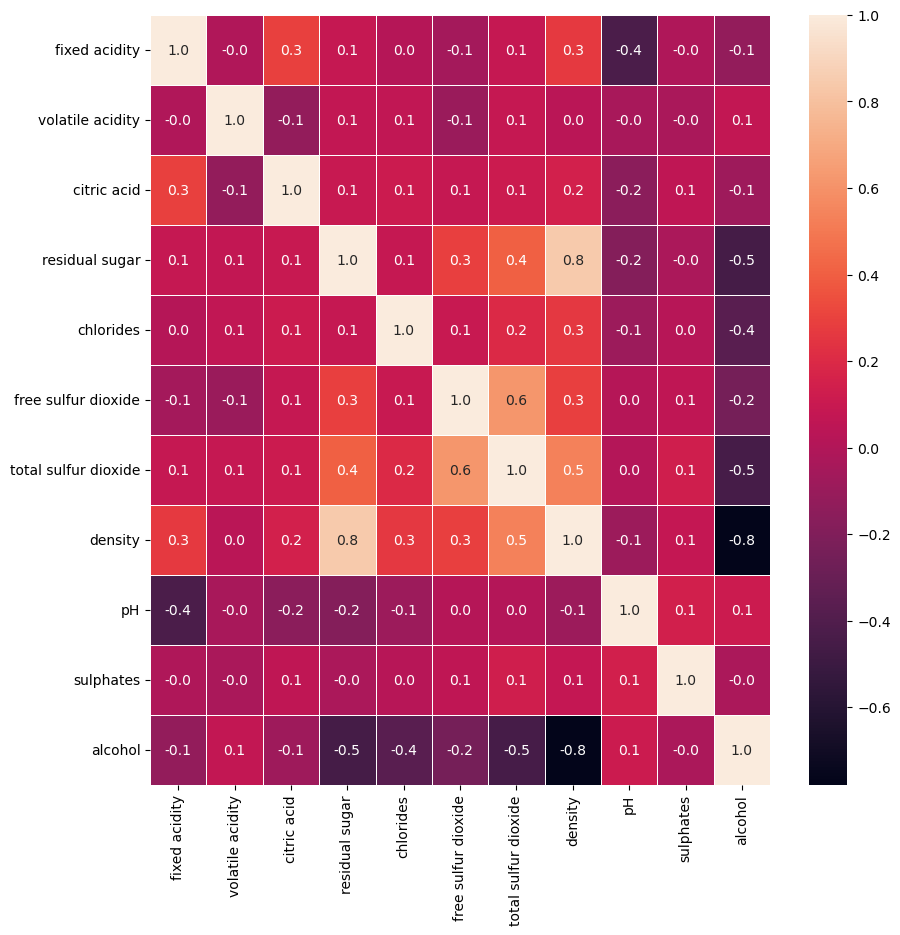

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, linewidth=.4,fmt=".1f")

In [117]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(X_train)
xtest = scaler.transform(X_test)

In [118]:
test_data = scaler.transform(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
model = RandomForestClassifier(random_state=42)
model.fit(xtrain,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2765, 1769]

In [97]:
y_pred = model.predict(test_data)

KBest Feature Selection

In [98]:
# Feature Selection: SelectKBest
k = 8  # Number of top features to select
kbest = SelectKBest(f_classif, k=k)
X_train_kbest = kbest.fit_transform(xtrain, y_train)
X_test_kbest = kbest.transform(test_data)

In [99]:
# Train-Test Split
X_train_kbest, X_val_kbest, y_train, y_val = train_test_split(X_train_kbest, y_train, test_size=0.2, random_state=42)

In [100]:
# Train the model with SelectKBest
rf_classifier_kbest = RandomForestClassifier(random_state=42)
rf_classifier_kbest.fit(X_train_kbest, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# k best columns
kbest.get_support(indices=True)

array([ 1,  3,  4,  5,  6,  7,  8, 10])

In [102]:
# Evaluate the model on validation set
y_pred_val_kbest = rf_classifier_kbest.predict(X_val_kbest)

In [103]:
# Generate predictions on the test set
y_pred_test_kbest = rf_classifier_kbest.predict(X_test_kbest)

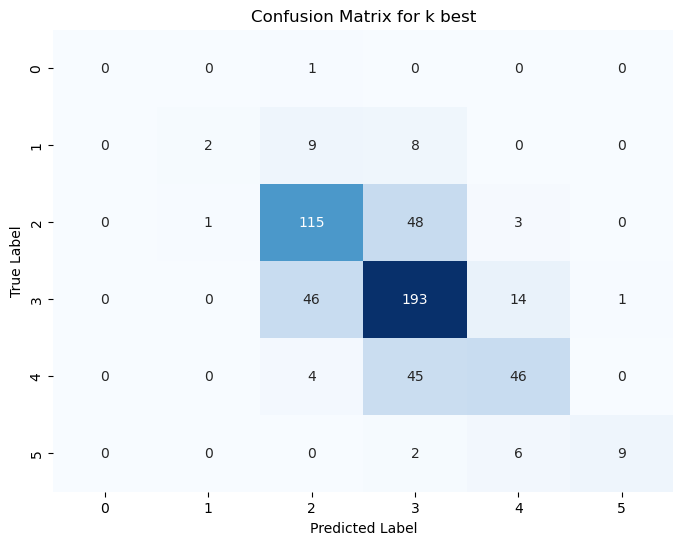

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_val_kbest)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for k best")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [105]:
f1_val = f1_score(y_val, y_pred_val_kbest, average='weighted')
print("F1 score on validation set:", f1_val)

F1 score on validation set: 0.6485575432495371


In [106]:
# Print F1 score on the test set
print("F1 score on test set:", f1_score(y_val, y_pred_test_kbest[:553], average='weighted'))

F1 score on test set: 0.35330631559482834


**RFE FEATURE IMPORTANCE**

In [107]:
# Feature Selection: Recursive Feature Elimination
rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier, n_features_to_select=8)
X_train_rfe = rfe.fit_transform(xtrain[:2212], y_train)

In [108]:
X_test_rfe = rfe.transform(test_data)

In [109]:
# Train-Test Split
X_train_rfe, X_val_rfe, y_train, y_val = train_test_split(X_train_rfe, y_train, test_size=0.2, random_state=42)

In [110]:
# Train the model with Recursive Feature Elimination
rf_classifier_rfe = RandomForestClassifier(random_state=42)
rf_classifier_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Generate predictions on the test set
predictions = rf_classifier_rfe.predict(X_test_rfe)

In [112]:
# Evaluate the model on validation set
y_pred_val = rf_classifier_rfe.predict(X_val_rfe)
X_train.columns[rfe.support_]

Index(['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates'],
      dtype='object')

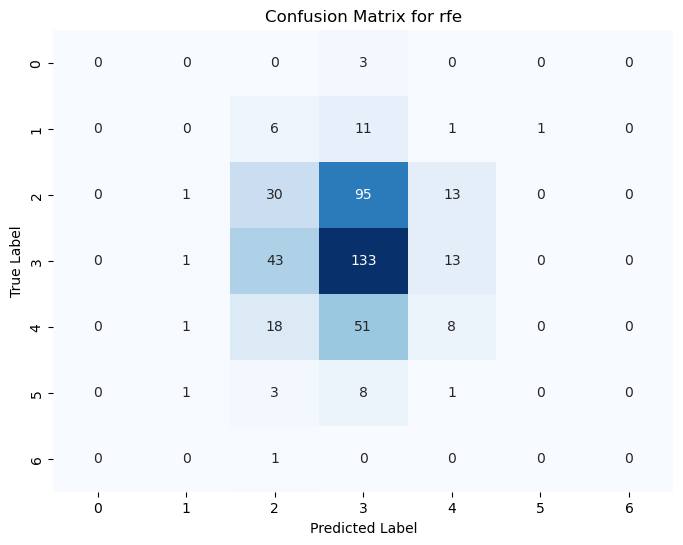

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for rfe")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [114]:
f1_val = f1_score(y_val, y_pred_val, average='weighted')
print("F1 score on validation set:", f1_val)

F1 score on validation set: 0.3355082587925174


RFECV FEATURE SELECTION

In [115]:
from sklearn.feature_selection import RFECV

# Feature Selection: RFECV
rf_classifier = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rf_classifier)
X_train_rfecv = rfecv.fit_transform(xtrain[:1769], y_train)
X_test_rfecv = rfecv.transform(test_data)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Train-Test Split
X_train_rfecv, X_val_rfecv, y_train, y_val = train_test_split(X_train_rfecv, y_train, test_size=0.2, random_state=42)

In [ ]:
# Train the model with RFECV and print F1 score
rf_classifier_rfecv = RandomForestClassifier(random_state=42)
rf_classifier_rfecv.fit(X_train_rfecv, y_train)

In [ ]:
# Evaluate the model on validation set and print F1 score
y_pred_val_rfecv = rf_classifier_rfecv.predict(X_val_rfecv)
f1_val_rfecv = f1_score(y_val, y_pred_val_rfecv, average='weighted')
print("F1 score on validation set:", f1_val_rfecv)

In [ ]:
# Generate predictions on the test set
y_pred_test_rfecv = rf_classifier_rfecv.predict(X_test_rfecv)

In [ ]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X_train.columns[rfecv.support_]) 

In [ ]:
rfecv.cv_results_['mean_test_score']

In [ ]:
#We can see that 7 features are required for highest accuracy here
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_val_rfecv)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Create the submission file
submission = pd.DataFrame({"ID": test_df["ID"], "Quality": y_pred})
submission.to_csv("submission.csv", index=False)

In [ ]:
submission